In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
mpg_data = pd.read_csv('data/auto-mpg.csv', na_values='?').dropna()
mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


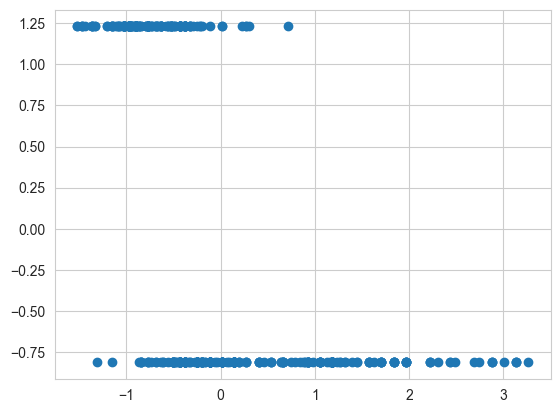

In [21]:
y = mpg_data['mpg'].values > 25
X = mpg_data[['weight', 'displacement', 'acceleration', 'horsepower']].values

X = (X - X.mean(axis=0, keepdims=True)) / X.std(axis=0, keepdims=True)
y = (y - y.mean(axis=0)) / y.std(axis=0)
plt.scatter(X[:, 3], y)

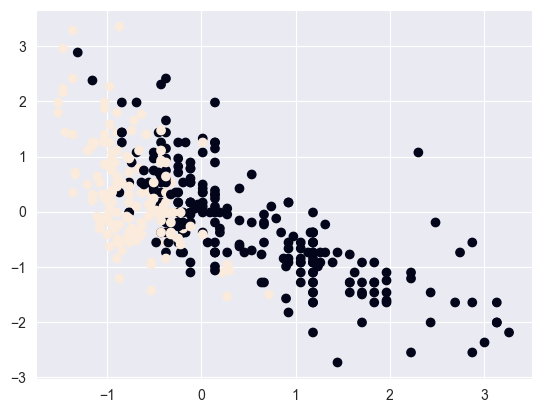

In [25]:
plt.scatter(X[:, 3], X[:, 2], c=y)

In [20]:
def predict(x, w, b):
    return x[0] * w[0] + x[1] * w[1] + x[2] * w[2] + x[3] * w[3] + b

In [ ]:
w = np.ones((4,))

predict(X[0])